In [1]:
#%%capture
#!pip install textstat
#!pip install yellowbrick
#!gdown --id 1S2Je11u8X1eog81GLwmLUQwA5SK4-CJN

In [2]:
import pandas as pd
import re
import textstat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('full_gpt_2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3323 entries, 0 to 3322
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3323 non-null   int64  
 1   Problem      3323 non-null   object 
 2   Difficulty   3323 non-null   float64
 3   Status       3323 non-null   object 
 4   Pass         3323 non-null   int64  
 5   Total        3323 non-null   int64  
 6   Description  3323 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 181.9+ KB


In [4]:
df = df.iloc[:,1:]
df.dropna(inplace=True)
df.head()

,Problem,Difficulty,Status,Pass,Total,Description
0,1dfroggereasy,3.3,Wrong Answer,14,38,Image by\nalptraum (iStock); Used under licens...
1,1dfroggerhard,8.6,Wrong Answer,1,12,Image by\nalptraum (iStock); Used under licens...
2,1sforall,6.7,Wrong Answer,1,39,The complexity of an integer is the minimum n...
3,2048,3.2,Wrong Answer,1,19,screenshot taken from\nhttp://gabrielecirulli....
4,246greaaat,8.3,Run Time Error,1,25,"Against her wishes, Rainbow Dash was put in ch..."


In [5]:
df['Status'].unique()

array(['Wrong Answer', 'Run Time Error', 'Accepted',
       'Time Limit Exceeded', 'Memory Limit Exceeded'], dtype=object)

# New features

In [6]:
# the Flesch Reading Ease Score
df['FRE'] = df['Description'].apply(lambda x: textstat.flesch_reading_ease(x))
# Sentence Count
df['SenCount'] = df['Description'].apply(lambda x: textstat.sentence_count(x))
# Lexicon Count
df['LexCount'] = df['Description'].apply(lambda x: textstat.lexicon_count(x))
# Readability Consensus based upon all the above tests (text standard)
df['textStd'] = df['Description'].apply(lambda x: textstat.text_standard(x, float_output=True))

df_len = len(df)
for index in range(df_len):
    if df['Status'][index] != 'Accepted':
        df['Pass'][index] = df['Pass'][index] - 1
# Test_diff = Total - Pass
df['Test_diff'] = df['Pass']/df['Total']

In [7]:
print(df_len)

3323


In [8]:
df.head()

,Problem,Difficulty,Status,Pass,Total,Description,FRE,SenCount,LexCount,textStd,Test_diff
0,1dfroggereasy,3.3,Wrong Answer,13,38,Image by\nalptraum (iStock); Used under licens...,68.10,29,581,8.0,0.342105
1,1dfroggerhard,8.6,Wrong Answer,0,12,Image by\nalptraum (iStock); Used under licens...,69.41,28,523,8.0,0.000000
2,1sforall,6.7,Wrong Answer,0,39,The complexity of an integer is the minimum n...,51.38,8,158,14.0,0.000000
3,2048,3.2,Wrong Answer,0,19,screenshot taken from\nhttp://gabrielecirulli....,70.33,18,320,8.0,0.000000
4,246greaaat,8.3,Run Time Error,0,25,"Against her wishes, Rainbow Dash was put in ch...",64.34,23,545,13.0,0.000000


In [9]:
df.describe()

,Difficulty,Pass,Total,FRE,SenCount,LexCount,textStd,Test_diff
count,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000
mean,5.131869,2.439663,25.634968,68.077168,16.567259,332.131809,9.371351,0.137319
std,2.151563,9.215832,25.822649,8.288271,7.327131,145.082488,2.068350,0.325348
min,1.200000,0.000000,2.000000,12.430000,2.000000,38.000000,3.000000,0.000000
25%,3.300000,0.000000,9.000000,62.720000,12.000000,234.000000,8.000000,0.000000
50%,5.200000,0.000000,19.000000,68.600000,16.000000,312.000000,9.000000,0.000000
75%,6.900000,0.000000,34.000000,73.980000,20.000000,403.000000,11.000000,0.000000
max,9.600000,200.000000,277.000000,89.790000,83.000000,1423.000000,21.000000,1.000000


# Difficulty 

In [10]:
sns.set(context="notebook", style="darkgrid", palette="bright")

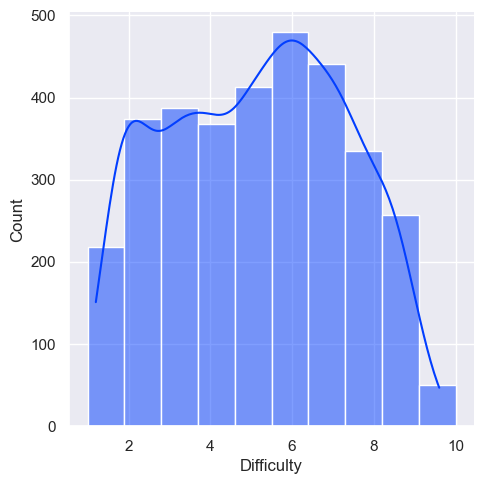

In [11]:
g = sns.displot(data=df, x="Difficulty", kde=True, bins=10, binrange=(1,10), height=5, aspect=1)
#g.set(title ='Histogram of Difficulty - 10 bins')
g.savefig("fig/hist_diff.png")

# Status

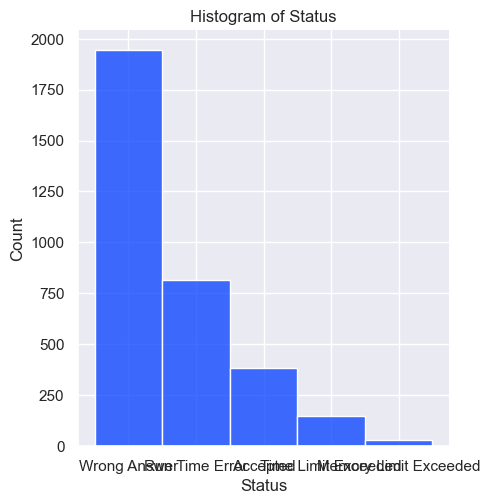

In [12]:
g = sns.displot(data=df, x="Status", height=5, aspect=1)
g.set(title ='Histogram of Status')

# Difficulty + Status

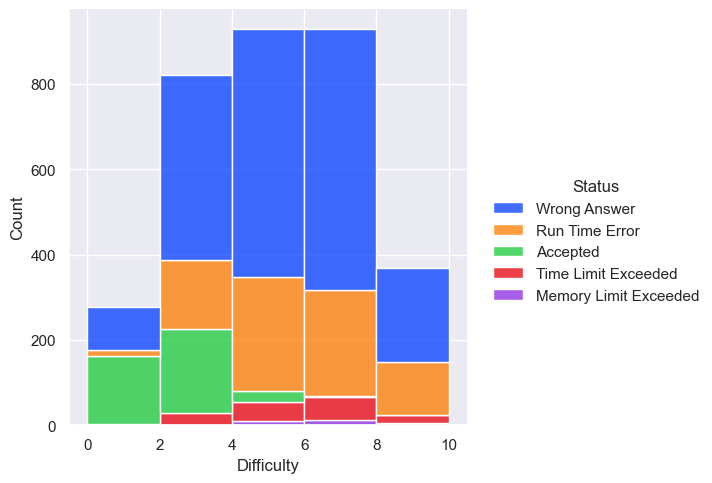

In [13]:
g = sns.displot(data=df, x="Difficulty", hue='Status', multiple="stack", bins=5, binrange=(0,10), height=5, aspect=1)
g.savefig("fig/hist_diff_status.png")

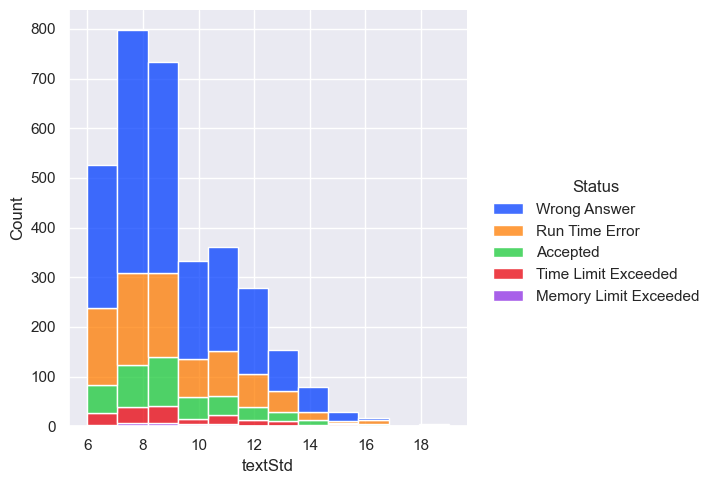

In [14]:
sns.displot(data=df, x="textStd", hue='Status', multiple="stack", bins=12, binrange=(6,19), height=5, aspect=1)

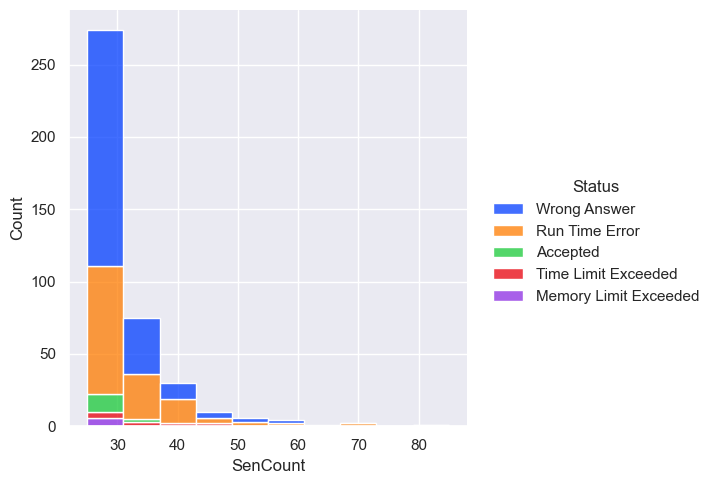

In [15]:
sns.displot(data=df, x="SenCount", hue='Status', multiple="stack", bins=10, binrange=(25,85), height=5, aspect=1)

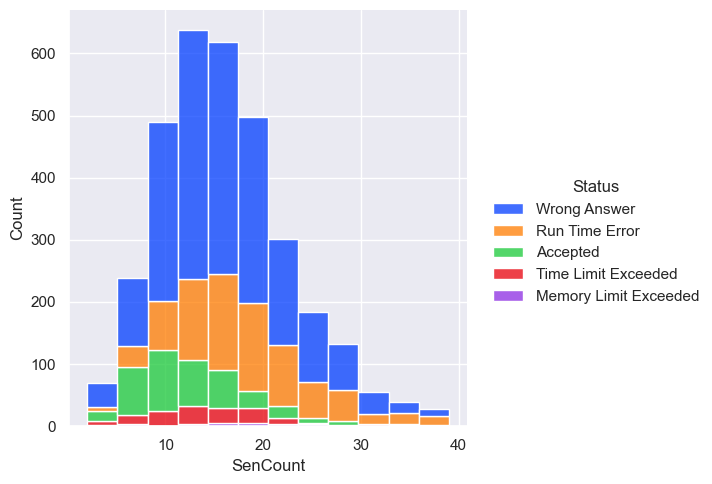

In [16]:
sns.displot(data=df, x="SenCount", hue='Status', multiple="stack", bins=12, binrange=(2,39), height=5, aspect=1)

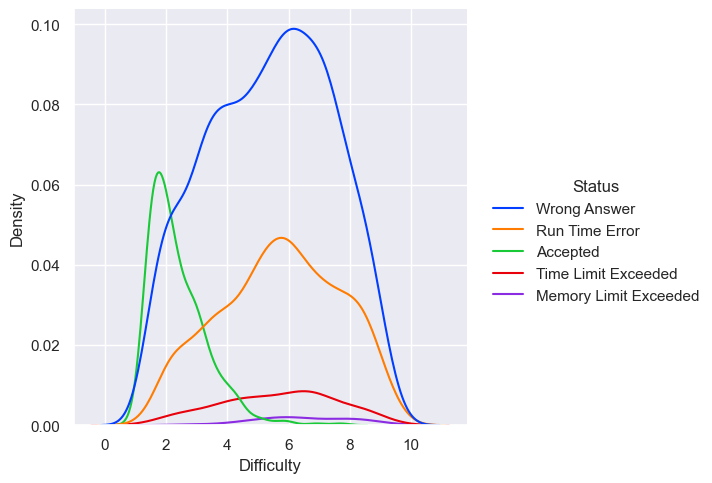

In [17]:
g = sns.displot(data=df, x="Difficulty", hue='Status', kind='kde', height=5, aspect=1)
g.savefig("fig/dens_diff.png")

In [18]:
df['Status'].unique()

array(['Wrong Answer', 'Run Time Error', 'Accepted',
       'Time Limit Exceeded', 'Memory Limit Exceeded'], dtype=object)

Difficulty
Accepted vs Wrong Answer & 2.8073134594636235e-140
Accepted vs Run Time Error & 2.1952729865251622e-137
Accepted vs Time Limit Exceeded & 1.1576611687219845e-60
Accepted vs Memory Limit Exceeded & 2.0484260441332776e-29
Wrong Answer vs Error & 0.0015244889326224856
Wrong Answer vs Time Limit Exceeded & 0.15739355422838322
Wrong Answer vs Memory Limit Exceeded & 0.008992024200500824
Run Time Error vs Time Limit Exceeded & 0.7625194867352071
Run Time Error vs Memory Limit Exceeded & 0.09941672228473593
Time Limit Exceeded vs Memory Limit Exceeded & 0.10225239466621784



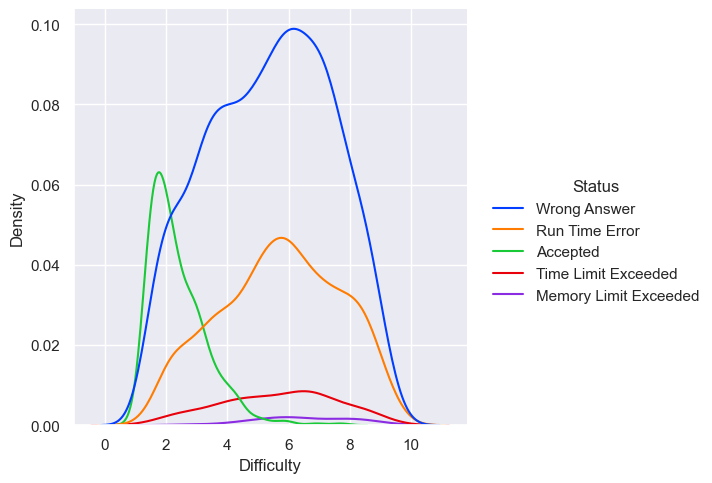

In [19]:
import numpy as np
import scipy

def ks_analysis(s): 
    wrong_answer = []
    accepted = []
    error = []
    timelimit = []
    memlimit = []
    print(s)
    for index in df.index:
        if(df["Status"][index] == "Wrong Answer"):
            wrong_answer.append(df[s][index])        
        elif(df["Status"][index] == "Accepted"):
            accepted.append(df[s][index])    
        elif(df["Status"][index] == "Run Time Error"):
            error.append(df[s][index])
        elif(df["Status"][index] == "Time Limit Exceeded"):
            timelimit.append(df[s][index])
        elif(df["Status"][index] == "Memory Limit Exceeded"):
            memlimit.append(df[s][index])
    print("Accepted vs Wrong Answer &", scipy.stats.kstest(accepted, wrong_answer).pvalue)
    print("Accepted vs Run Time Error &", scipy.stats.kstest(accepted, error).pvalue)
    print("Accepted vs Time Limit Exceeded &", scipy.stats.kstest(accepted, timelimit).pvalue)
    print("Accepted vs Memory Limit Exceeded &", scipy.stats.kstest(accepted, memlimit).pvalue)
    print("Wrong Answer vs Error &", scipy.stats.kstest(wrong_answer, error).pvalue)
    print("Wrong Answer vs Time Limit Exceeded &", scipy.stats.kstest(wrong_answer, timelimit).pvalue)
    print("Wrong Answer vs Memory Limit Exceeded &", scipy.stats.kstest(wrong_answer, memlimit).pvalue)
    print("Run Time Error vs Time Limit Exceeded &", scipy.stats.kstest(error, timelimit).pvalue)
    print("Run Time Error vs Memory Limit Exceeded &", scipy.stats.kstest(error, memlimit).pvalue)
    print("Time Limit Exceeded vs Memory Limit Exceeded &", scipy.stats.kstest(timelimit, memlimit).pvalue)
    sns.displot(data=df, x=s, hue='Status', kind='kde', height=5, aspect=1)
    print()

#measures = ['Difficulty','FRE','LexCount','textStd']
measures = ['Difficulty']
for m in measures:
    ks_analysis(m)

In [20]:
import numpy as np
import scipy

def status_range(mindiff, maxdiff): 
    #print('Difficulty range:', mindiff, maxdiff)
    print("\\multicolumn{6}{c}{\\textbf{Problem Difficulty: %1.1f - %1.1f}} \\\\" % (mindiff,maxdiff))
    print("\\hline")
    prefix_str = """\\textbf{Status} & \\multicolumn{1}{l}{\\textbf{Count}} & \\multicolumn{1}{l}{\\textbf{Mean}} & \\multicolumn{1}{l}{\\textbf{Minimum}} & \\multicolumn{1}{l}{\\textbf{Maximum}} & \\multicolumn{1}{l}{\\textbf{Std. Dev.}} \\\\"""
    print(prefix_str)
    df_tmp = df[(df['Difficulty'] >= mindiff) & (df['Difficulty'] < maxdiff)]
    #print(df_tmp)
    #print('Problem count:', len(df_tmp))
    status = ['Accepted','Wrong Answer', 'Run Time Error', 'Time Limit Exceeded', 'Memory Limit Exceeded']
    for st in status:
        #print(st)
        df_stat = df_tmp[df_tmp['Status'] == st]
        #print(df_stat)
        if (st == 'Accepted'):
            if len(df_stat['Test_diff']) > 0:
                x = df_stat['Test_diff'].describe(percentiles=[])
                print("\\textit{%s} & %d &  &  &  & \\\\" % (st,len(df_stat)))
            else:
                print("\\textit{%s} & 0 &  &  &  &   \\\\" % (st))
        else:
            if len(df_stat['Test_diff']) > 0:
                x = df_stat['Test_diff'].describe(percentiles=[])
                print("\\textit{%s} & %d & %2.3f & %2.3f & %2.3f & %2.3f \\\\" % (st,len(df_stat),x['mean'],x['min'],x['max'],x['std']))
            else:
                print("\\textit{%s} & 0 &  &  &  &   \\\\" % (st))
    print("Total & %d &  &  &  &   \\\\" % len(df_tmp))
    print("\\hline\\hline")

In [21]:
import numpy as np
import scipy

def status_range(mindiff, maxdiff): 
    #print('Difficulty range:', mindiff, maxdiff)
    print("\\multicolumn{6}{c}{\\textbf{Problem Difficulty: %1.1f - %1.1f}} \\\\" % (mindiff,maxdiff))
    print("\\hline")
    prefix_str = """\\textbf{Status} & \\multicolumn{1}{l}{\\textbf{Count}} & \\multicolumn{1}{l}{\\textbf{Median}} & \\multicolumn{1}{l}{\\textbf{Mean}} & \\multicolumn{1}{l}{\\textbf{Min}} & \\multicolumn{1}{l}{\\textbf{Max}} \\\\"""
    print(prefix_str)
    df_tmp = df[(df['Difficulty'] >= mindiff) & (df['Difficulty'] < maxdiff)]
    #print(df_tmp)
    #print('Problem count:', len(df_tmp))
    status = ['Accepted','Wrong Answer', 'Run Time Error', 'Time Limit Exceeded', 'Memory Limit Exceeded']
    for st in status:
        #print(st)
        df_stat = df_tmp[df_tmp['Status'] == st]
        #print(df_stat)
#        if (st == 'Accepted'):
#            if len(df_stat['Test_diff']) > 0:
#                x = df_stat['Test_diff'].describe(percentiles=[])
#                print("\\textit{%s} & %d &  &  &  & \\\\" % (st,len(df_stat)))
#            else:
#                print("\\textit{%s} & 0 &  &  &  &   \\\\" % (st))
#        else:
#            if len(df_stat['Test_diff']) > 0:
        x = df_stat['Total'].describe(percentiles=[])
        print("\\textit{%s} & %d & %2.1f & %2.1f & %2.1f & %2.1f \\\\" % (st,len(df_stat),x['50%'],x['mean'],x['min'],x['max']))
        #    else:
        #        print("\\textit{%s} & 0 &  &  &  &   \\\\" % (st))
    print("Total & %d &  &  &  &   \\\\" % len(df_tmp))
    print("\\hline\\hline")

In [22]:
df['Test_diff'].describe(percentiles=[])['50%']

0.0

In [23]:
df['Total'].unique().mean()#.describe()

81.16312056737588

In [24]:
status_range(0,2)
status_range(2,4)
status_range(4,6)
status_range(6,8)
status_range(8,10)

\multicolumn{6}{c}{\textbf{Problem Difficulty: 0.0 - 2.0}} \\
\hline
\textbf{Status} & \multicolumn{1}{l}{\textbf{Count}} & \multicolumn{1}{l}{\textbf{Median}} & \multicolumn{1}{l}{\textbf{Mean}} & \multicolumn{1}{l}{\textbf{Min}} & \multicolumn{1}{l}{\textbf{Max}} \\
\textit{Accepted} & 161 & 13.0 & 18.5 & 2.0 & 200.0 \\
\textit{Wrong Answer} & 99 & 13.0 & 20.4 & 2.0 & 140.0 \\
\textit{Run Time Error} & 14 & 17.0 & 28.0 & 2.0 & 108.0 \\
\textit{Time Limit Exceeded} & 2 & 27.0 & 27.0 & 22.0 & 32.0 \\
\textit{Memory Limit Exceeded} & 0 & nan & nan & nan & nan \\
Total & 276 &  &  &  &   \\
\hline\hline
\multicolumn{6}{c}{\textbf{Problem Difficulty: 2.0 - 4.0}} \\
\hline
\textbf{Status} & \multicolumn{1}{l}{\textbf{Count}} & \multicolumn{1}{l}{\textbf{Median}} & \multicolumn{1}{l}{\textbf{Mean}} & \multicolumn{1}{l}{\textbf{Min}} & \multicolumn{1}{l}{\textbf{Max}} \\
\textit{Accepted} & 198 & 12.0 & 17.5 & 2.0 & 148.0 \\
\textit{Wrong Answer} & 434 & 16.0 & 22.0 & 2.0 & 170.0 \\
\textit{

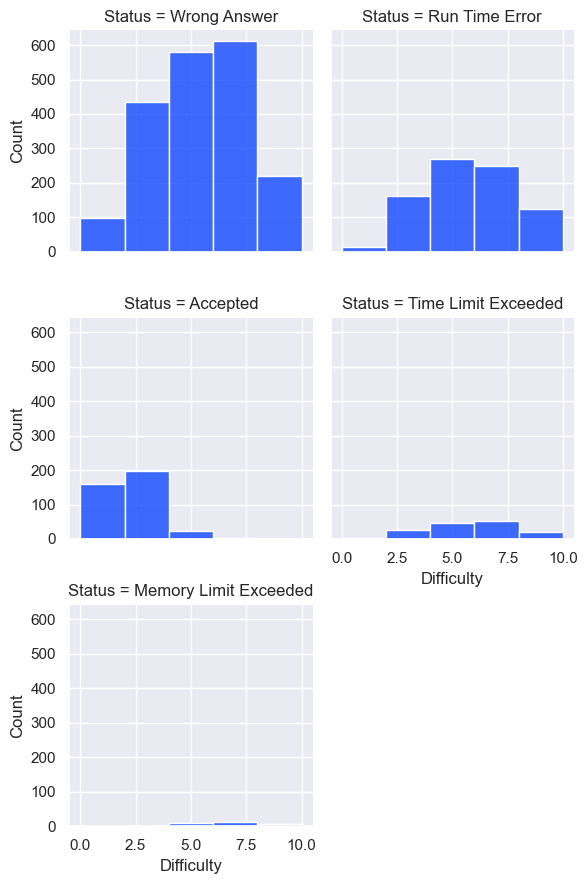

In [27]:
g = sns.FacetGrid(df, col="Status", col_wrap=2)
g.map_dataframe(sns.histplot, x="Difficulty", binrange=(0,10),binwidth = 2)
g.savefig("fig/hist_diff_status_plots.png")

# Correlation

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Problem      1730 non-null   object 
 1   Difficulty   1730 non-null   float64
 2   Status       1730 non-null   object 
 3   Pass         1730 non-null   int64  
 4   Total        1730 non-null   int64  
 5   Description  1730 non-null   object 
 6   FRE          1730 non-null   float64
 7   SenCount     1730 non-null   int64  
 8   LexCount     1730 non-null   int64  
 9   textStd      1730 non-null   float64
 10  Test_diff    1730 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 148.8+ KB


<Axes: >

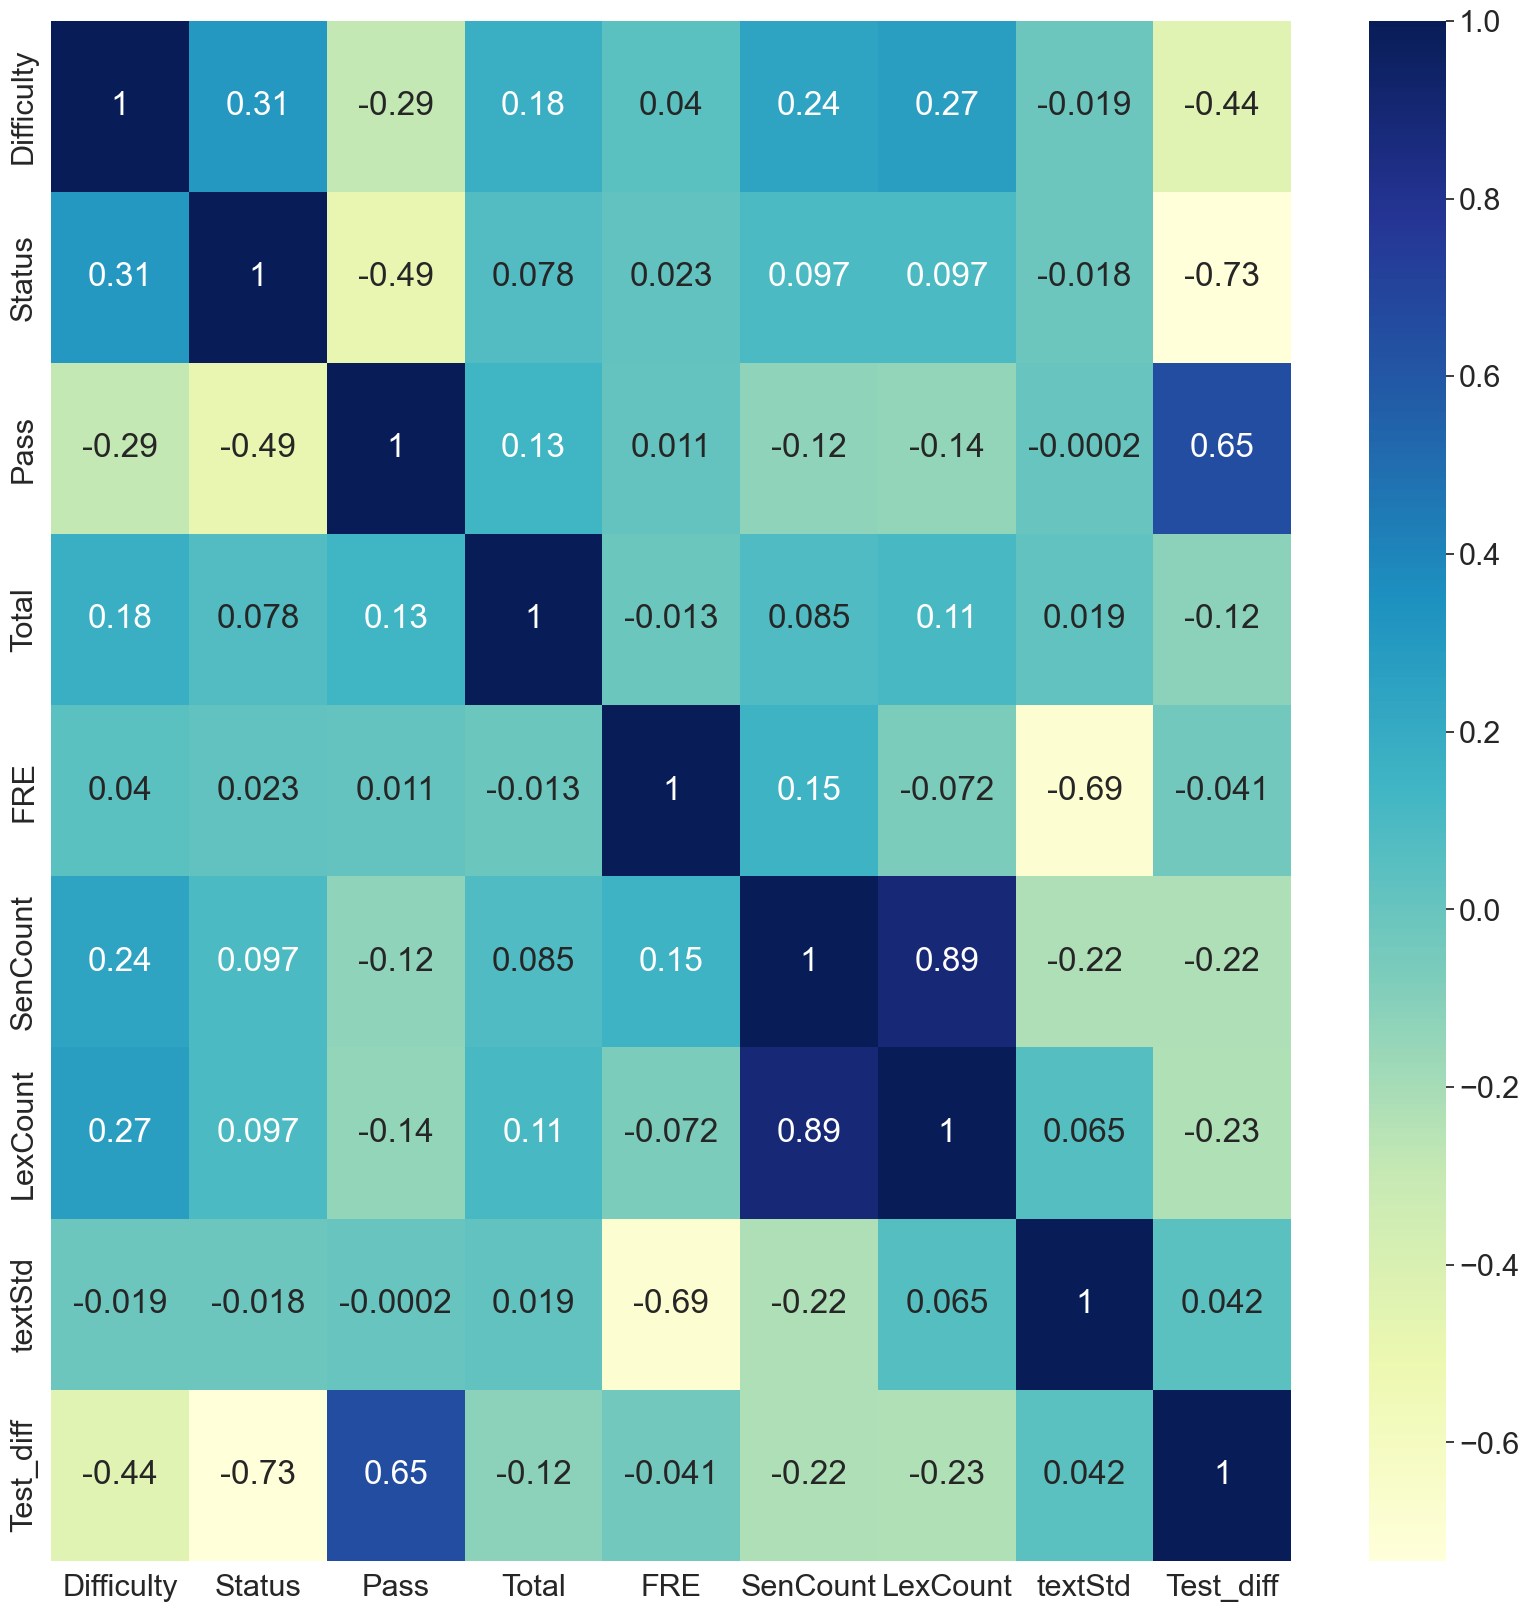

In [24]:
from sklearn import preprocessing

df_encode = df.copy()
df_encode = df_encode.drop(['Problem','Description'], axis=1)
le = preprocessing.LabelEncoder()
df_encode['Status'] = le.fit_transform(df_encode['Status'])

sns.set(font_scale = 2)
plt.figure(figsize=(20,20))
sns.heatmap(df_encode.corr(), cmap="YlGnBu", annot=True)

# Test_diff

<Axes: xlabel='Difficulty', ylabel='Test_diff'>

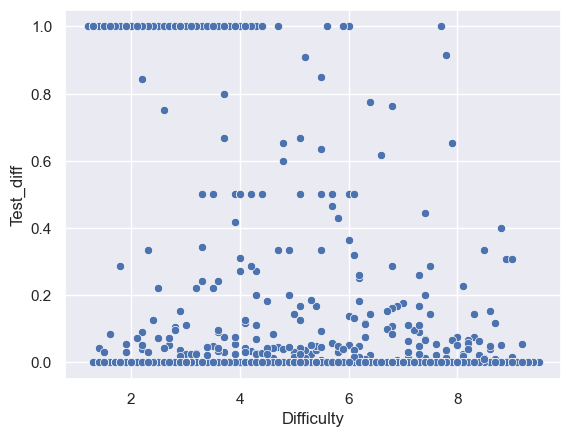

In [25]:
sns.set(font_scale = 1)
sns.scatterplot(data=df, x='Difficulty', y='Test_diff')

<Axes: xlabel='Difficulty', ylabel='Test_diff'>

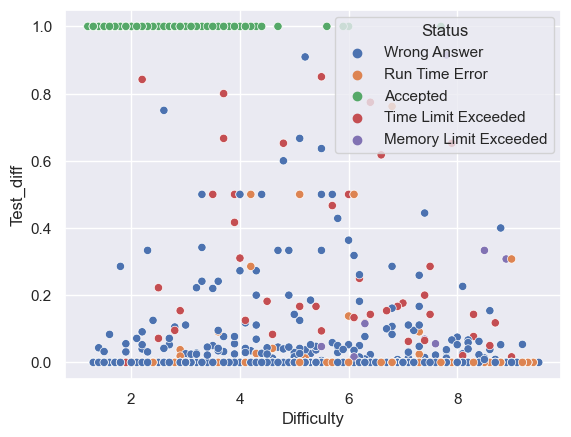

In [26]:
sns.scatterplot(data=df, x='Difficulty', y='Test_diff', hue='Status')

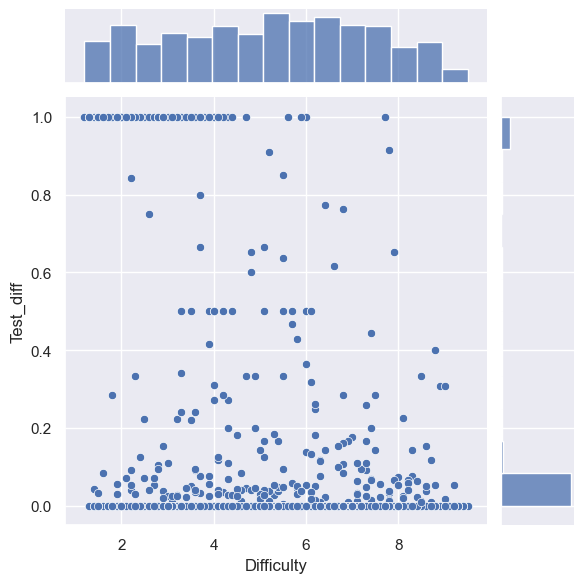

In [27]:
sns.jointplot(data=df, x='Difficulty', y='Test_diff')

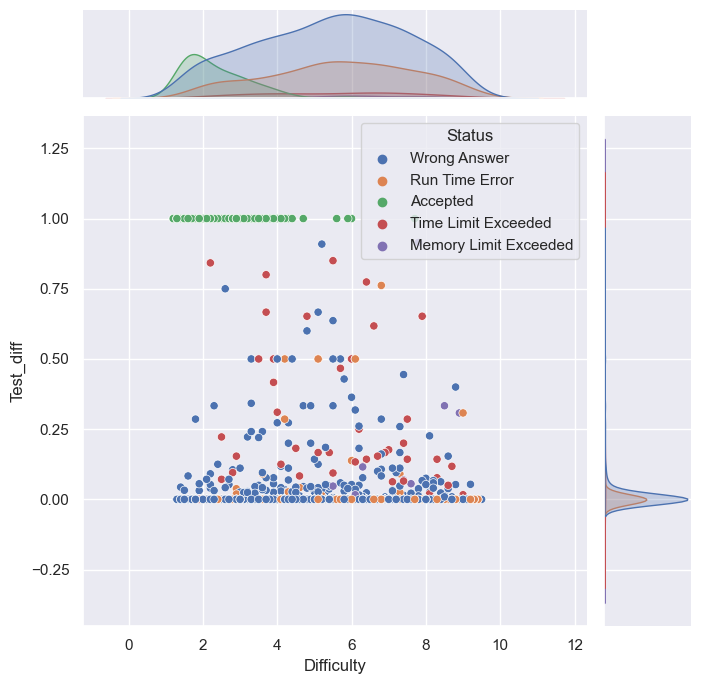

In [28]:
sns.jointplot(data=df, x='Difficulty', y='Test_diff', hue='Status', height=7)

# Kmeans

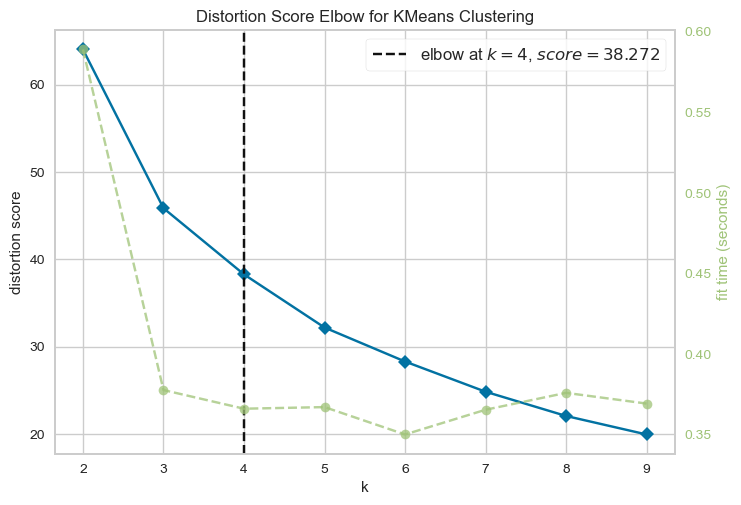

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import preprocessing

X = df.drop(columns=['Problem', 'Description', 'Status', 'Total', 'textStd','Test_diff', 'FRE', 'SenCount'])
sc = preprocessing.MinMaxScaler()
cols = list(X.columns)
X[cols] = sc.fit_transform(X[cols])

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [30]:
# from yellowbrick.cluster import SilhouetteVisualizer

# fig, ax = plt.subplots(4, 2, figsize=(15,8))
# for i in range(2,10):
#     '''
#     Create KMeans instances for different number of clusters
#     '''
#     km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
#     q, mod = divmod(i, 2)
#     '''
#     Create SilhouetteVisualizer instance with KMeans instance
#     Fit the visualizer
#     '''
#     visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
#     visualizer.fit(X) 

In [31]:
from pandas.plotting import parallel_coordinates
from itertools import cycle, islice

In [32]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
X['prediction'] = y_kmeans

<Axes: >

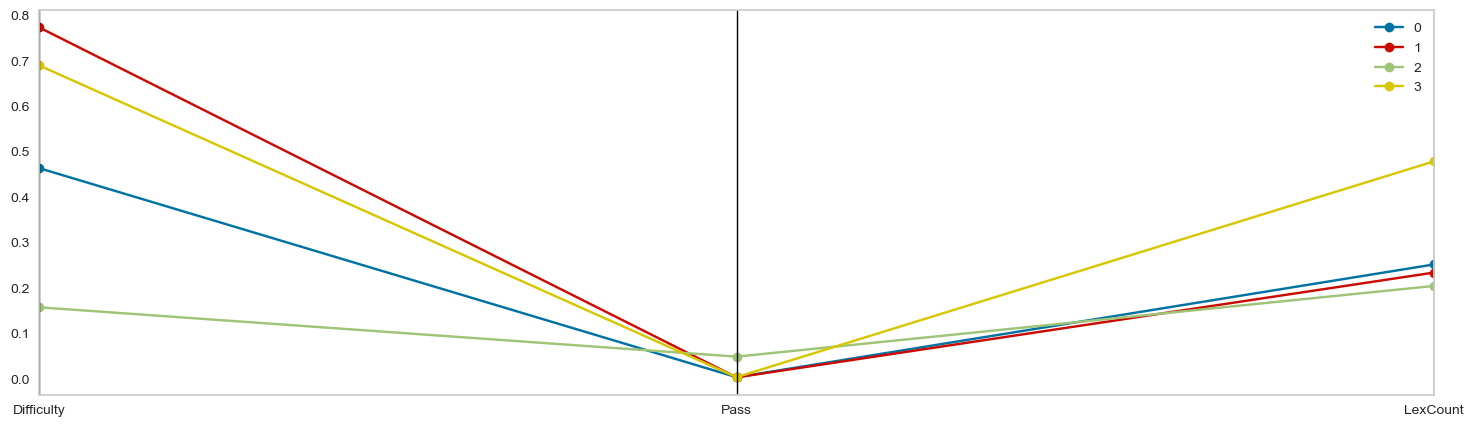

In [33]:
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(X['prediction'])))
plt.figure(figsize=(18,5))
centroids =  pd.DataFrame(kmeans.cluster_centers_)
centroid_labels = kmeans.predict(centroids)
centroids['prediction'] = centroid_labels
centroids.columns = X.columns
parallel_coordinates(centroids, 'prediction', color = my_colors, marker='o')

To interpret the clustering results, try to find the characteristics associated to each cluster. Example of how to interpret the above KMeans results:
- Cluster 0: (High Difficulty - Low Pass):  Average Total Tasks - (Average/High) Readability Index (ARI) - High DCR - High FRE - High Sentence Count - High Lexicon Count - Average textStd - Average/Low Difference between Total and Pass  


In [34]:
df['prediction'] = y_kmeans
df[df['prediction'] == 2]

,Problem,Difficulty,Status,Pass,Total,Description,FRE,SenCount,LexCount,textStd,Test_diff,prediction
0,1dfroggereasy,3.3,Wrong Answer,13,38,Image by\nalptraum (iStock); Used under licens...,68.10,29,581,8.0,0.342105,2
3,2048,3.2,Wrong Answer,0,19,screenshot taken from\nhttp://gabrielecirulli....,70.33,18,320,8.0,0.000000,2
5,3dprinter,2.8,Wrong Answer,0,33,"Picture by\nAriosvaldo Gonzáfoles, cc-by\n\n\n...",69.75,6,160,12.0,0.000000,2
7,8queens,3.0,Accepted,86,86,"In the game of chess, the queen is a powerful ...",73.98,13,185,7.0,1.000000,2
8,99problems,2.8,Wrong Answer,2,19,Ingrid is the founder of a company that sells ...,73.07,8,121,7.0,0.105263,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1715,karte,1.6,Accepted,13,13,"Recently, Pero has been into robotics, so he d...",76.35,13,263,9.0,1.000000,2
1716,kastenlauf,3.5,Wrong Answer,0,13,"Once every year, Jo and his friends want to vi...",74.53,14,308,8.0,0.000000,2
1721,kcuddlanod,1.9,Accepted,24,24,Oh no! Donald Duck accidentally went through P...,70.84,12,207,8.0,1.000000,2
1724,keepitcool,2.7,Wrong Answer,0,30,"Picture by\nFitness First via Vimeo, cc by\n\n...",68.64,16,445,11.0,0.000000,2


In [35]:
df.drop(columns=['prediction'], inplace=True)

# Classification

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

le = preprocessing.LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])
X_clf = X.drop(columns=['prediction'])
y_clf = df['Status']
X_train, X_test, y_train, y_test = train_test_split(X_clf, y_clf, test_size=0.2)

In [37]:
X_train.head()

,Difficulty,Pass,LexCount
1378,0.578313,0.000000,0.446303
1599,0.939759,0.000000,0.250880
100,0.855422,0.006757,0.132042
320,0.698795,0.000000,0.289613
1329,0.204819,0.000000,0.164613


In [38]:
#from sklearn.svm import SVC
#grid_search = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#               'degree': [3,4,5,6,7,8],
#               'gamma': ['auto', 'scale']}

#clf = SVC()
#model = GridSearchCV(estimator = clf, param_grid = grid_search, 
#                               cv = 4, verbose= 5, n_jobs = -1)
#model.fit(X_train, y_train)

#y_pred = model.best_estimator_.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test,y_pred))
#print(model.best_params_)

In [39]:
#from sklearn.ensemble import GradientBoostingClassifier
#
#grid_search = {'loss': ['log_loss', 'deviance', 'exponential'],
#               'learning_rate': [0.1,0.03,0.01,0.003,0.001],
#               'n_estimators': [100, 300],
#               'criterion': ['friedman_mse', 'squared_error']}

#clf = GradientBoostingClassifier()
#model = GridSearchCV(estimator = clf, param_grid = grid_search, 
#                               cv = 4, verbose= 5, n_jobs = -1)
#model.fit(X_train, y_train)
#
#y_pred = model.best_estimator_.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
#print(accuracy_score(y_test,y_pred))
#print(model.best_params_)

# Hopular

TODO